In [157]:
import numpy as np
import pandas as pd
import re

In [158]:
pd.set_option('display.max_colwidth', None)
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [159]:
df = pd.read_csv('/Users/yogeshgupta/neeraj/data/processed/gurgaon_properties_cleaned_v1.csv')

In [160]:
df.duplicated().sum()

122

In [161]:
df.head(1)
# focus is on -> areaWithType, additionalRoom, agePossession, furnishDetails, features 

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features
0,flat,trisara our homes 3,sohna road,0.34,5405.0,629.0,Carpet area: 629 (58.44 sq.m.),2,2,1,not available,0.0,NaN,0 to 1 Year Old,"['Metro Station', 'Gyanchand Market', 'Rajiv Chowk', 'KMP Expressway', 'Govt.Sr.Sec School(boys)', 'Jindal College', 'Kidzee', 'Vishvakarma Mandir', 'Mamta Hospital', 'Fortis', 'IGI T3', 'Oriental Bank of Commerce', 'Rajiv Gandhi Park']",NaN,NaN


## 1. areaWithType

In [162]:
df.sample(5)[['price','area','areaWithType']]

,price,area,areaWithType
2993,2.04,1395.0,Super Built up area 1795(166.76 sq.m.)Built Up area: 1595 sq.ft. (148.18 sq.m.)Carpet area: 1395 sq.ft. (129.6 sq.m.)
1809,0.92,603.0,Built Up area: 603 (56.02 sq.m.)
3780,5.25,4500.0,Super Built up area 4500(418.06 sq.m.)
2820,2.40,1650.0,Super Built up area 1650(153.29 sq.m.)Built Up area: 1600 sq.ft. (148.64 sq.m.)Carpet area: 1250 sq.ft. (116.13 sq.m.)
1919,0.78,1350.0,Super Built up area 1350(125.42 sq.m.)


In [163]:
# This function extracts the Super Built up area
def get_super_built_up_area(text):
    match = re.search(r'Super Built up area (\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [164]:
# This function extracts the Built Up area or Carpet area
def get_area(text, area_type):
    match = re.search(area_type + r'\s*:\s*(\d+\.?\d*)', text)
    if match:
        return float(match.group(1))
    return None

In [165]:
# This function checks if the area is provided in sq.m. and converts it to sqft if needed
def convert_to_sqft(text, area_value):
    if area_value is None:
        return None
    match = re.search(r'{} \((\d+\.?\d*) sq.m.\)'.format(area_value), text)
    if match:
        sq_m_value = float(match.group(1))
        return sq_m_value * 10.7639  # conversion factor from sq.m. to sqft
    return area_value

In [166]:
# Extract Super Built up area and convert to sqft if needed
df['super_built_up_area'] = df['areaWithType'].apply(get_super_built_up_area)
df['super_built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['super_built_up_area']), axis=1)

# Extract Built Up area and convert to sqft if needed
df['built_up_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Built Up area'))
df['built_up_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['built_up_area']), axis=1)

# Extract Carpet area and convert to sqft if needed
df['carpet_area'] = df['areaWithType'].apply(lambda x: get_area(x, 'Carpet area'))
df['carpet_area'] = df.apply(lambda x: convert_to_sqft(x['areaWithType'], x['carpet_area']), axis=1)

In [167]:
df[['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].sample(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
3099,0.21,flat,302.0,Carpet area: 302 (28.06 sq.m.),NaN,NaN,302.0
122,9.35,house,3240.0,Plot area 3240(301.01 sq.m.)Built Up area: 7500 sq.ft. (696.77 sq.m.)Carpet area: 6000 sq.ft. (557.42 sq.m.),NaN,7500.0,6000.0
538,0.45,flat,956.0,Carpet area: 850 (78.97 sq.m.),NaN,NaN,850.0
1523,2.90,house,1557.0,Plot area 173(144.65 sq.m.)Built Up area: 1415 sq.yards (1183.12 sq.m.)Carpet area: 1350 sq.yards (1128.77 sq.m.),NaN,1415.0,1350.0
1317,1.75,flat,2290.0,Super Built up area 2290(212.75 sq.m.)Carpet area: 1800 sq.ft. (167.23 sq.m.),2290.0,NaN,1800.0


In [168]:
df.duplicated().sum()

122

In [169]:
df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].shape

(534, 7)

In [170]:
df[df['areaWithType'].str.contains('Plot')][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].head(5)

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
3,8.00,house,300.0,Plot area 300(27.87 sq.m.),NaN,NaN,NaN
5,2.95,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
8,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,NaN,NaN
11,1.65,house,540.0,Plot area 60(50.17 sq.m.)Built Up area: 540 sq.yards (451.51 sq.m.)Carpet area: 500 sq.yards (418.06 sq.m.),NaN,540.0,500.0


In [171]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2616
carpet_area            1859
dtype: int64

In [172]:
all_nan_df = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']]

In [173]:
all_nan_df.head()

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,NaN,NaN
3,8.00,house,300.0,Plot area 300(27.87 sq.m.),NaN,NaN,NaN
5,2.95,house,1800.0,Plot area 200(167.23 sq.m.),NaN,NaN,NaN
8,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,NaN,NaN
35,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,NaN,NaN


In [174]:
all_nan_index = df[((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))][['price','property_type','area','areaWithType','super_built_up_area','built_up_area','carpet_area']].index

In [175]:
# Function to extract plot area from 'areaWithType' column
def extract_plot_area(area_with_type):
    match = re.search(r'Plot area (\d+\.?\d*)', area_with_type)
    return float(match.group(1)) if match else None

In [176]:
all_nan_df['built_up_area'] = all_nan_df['areaWithType'].apply(extract_plot_area)

# Update the original dataframe
#gurgaon_properties.update(filtered_rows)

In [177]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
3,8.00,house,300.0,Plot area 300(27.87 sq.m.),NaN,300.00,NaN
5,2.95,house,1800.0,Plot area 200(167.23 sq.m.),NaN,200.00,NaN
8,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,692.00,NaN
35,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN
36,9.50,house,2844.0,Plot area 316(264.22 sq.m.),NaN,316.00,NaN
45,5.15,house,1935.0,Plot area 215(179.77 sq.m.),NaN,215.00,NaN
46,9.00,house,3159.0,Plot area 351(293.48 sq.m.),NaN,351.00,NaN
47,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,100.00,NaN
50,4.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,240.00,NaN


In [178]:
def convert_scale(row):
    if np.isnan(row['area']) or np.isnan(row['built_up_area']):
        return row['built_up_area']
    else:
        if round(row['area']/row['built_up_area']) == 9.0:
            return row['built_up_area'] * 9
        elif round(row['area']/row['built_up_area']) == 11.0:
            return row['built_up_area'] * 10.7
        else:
            return row['built_up_area']

In [179]:
all_nan_df['built_up_area'] = all_nan_df.apply(convert_scale,axis=1)

In [180]:
all_nan_df

,price,property_type,area,areaWithType,super_built_up_area,built_up_area,carpet_area
2,4.99,house,2642.0,Plot area 270(225.75 sq.m.),NaN,270.00,NaN
3,8.00,house,300.0,Plot area 300(27.87 sq.m.),NaN,300.00,NaN
5,2.95,house,1800.0,Plot area 200(167.23 sq.m.),NaN,1800.00,NaN
8,7.00,house,6228.0,Plot area 692(578.6 sq.m.),NaN,6228.00,NaN
35,2.20,house,1800.0,Plot area 1800(167.23 sq.m.),NaN,1800.00,NaN
36,9.50,house,2844.0,Plot area 316(264.22 sq.m.),NaN,2844.00,NaN
45,5.15,house,1935.0,Plot area 215(179.77 sq.m.),NaN,1935.00,NaN
46,9.00,house,3159.0,Plot area 351(293.48 sq.m.),NaN,3159.00,NaN
47,2.25,house,900.0,Plot area 100(83.61 sq.m.),NaN,900.00,NaN
50,4.70,house,2160.0,Plot area 240(200.67 sq.m.),NaN,2160.00,NaN


In [181]:
# update the original dataframe
df.update(all_nan_df)

In [182]:
df.isnull().sum()

property_type             0
society                   1
sector                    0
price                    18
price_per_sqft           18
area                     18
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
additionalRoom            0
floorNum                 19
facing                 1105
agePossession             1
nearbyLocations         177
furnishDetails          981
features                635
super_built_up_area    1888
built_up_area          2070
carpet_area            1859
dtype: int64

In [183]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area
0,flat,trisara our homes 3,sohna road,0.34,5405.0,629.0,Carpet area: 629 (58.44 sq.m.),2,2,1,not available,0.0,NaN,0 to 1 Year Old,"['Metro Station', 'Gyanchand Market', 'Rajiv Chowk', 'KMP Expressway', 'Govt.Sr.Sec School(boys)', 'Jindal College', 'Kidzee', 'Vishvakarma Mandir', 'Mamta Hospital', 'Fortis', 'IGI T3', 'Oriental Bank of Commerce', 'Rajiv Gandhi Park']",NaN,NaN,NaN,NaN,629.000000
1,flat,signature global superbia,sector 95,0.40,6728.0,595.0,Carpet area: 594.52 (55.23 sq.m.),2,2,3,not available,2.0,NaN,Apr 2026,"['Huda Metro Station', 'V3S Sapphire Ninety Mall', 'Pataudi Road', 'NH 352W', 'RPS International School', 'SGT University', 'ESIC Hospital', 'Indira Gandhi Intl Airport', 'Farrukh Nagar Railway Station']",[],NaN,NaN,NaN,594.490197
2,house,independent,sector 2,4.99,18889.0,2642.0,Plot area 270(225.75 sq.m.),4,4,3+,"pooja room,servant room,store room",3.0,North,5 to 10 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Big Cinemas', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Moti Mahal', 'Pind Baluchi', ""McDonald's"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal']",NaN,270.0,NaN
3,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,"pooja room,study room,servant room",2.0,North,1 to 5 Year Old,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'State bank ATM', 'Icici bank ATM', 'Standard chartered ATM', 'Vatsalya Clinic', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'pracksht hospital', 'Meher Clinic', 'Bones Clinic - Orthopaedics', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Dr. Naresh Pandita', 'Arihant Hospital', 'Dr. Anuj Sharma', 'Wembley estate club', 'HUDA Office Complex', 'Medisca', 'Pernod Ricard Charitable Dispensary', 'SPAZE BUSINESS PARK', 'Unitech', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank', 'Hdfc bank and atm', 'Hdfc bank', '222', 'Pizza Hut', 'Madison and Pike', 'India', 'Haldiram', 'Raj Restaurant', 'Gurugram University', 'Kamla International', 'Amity Global School', 'St. Angels Sr', 'Manav Rachna School', 'Delhi Public School Primary Section', 'IILM', 'St. Angels Jr', 'Iilm University', 'Manav Rachna Swimming Pool']","['1 Geyser', '1 Chimney', '2 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,300.0,NaN
4,flat,godrej nature plus,sector 33,1.55,9955.0,1557.0,Carpet area: 1557 (144.65 sq.m.),3,2,3+,not available,8.0,East,Within 6 months,"['Signature Global Infinity Mall Sohna', 'Badshahpur Sohna Rd Hwy', 'Gurjar Samrat Jaipal Khatana Marg', 'K. R. Mangalam University', 'Vidya Niketan S

## 2.additionalRoom

In [184]:
df['additionalRoom'].value_counts()

additionalRoom
not available                                    1587
servant room                                      705
study room                                        250
others                                            225
pooja room                                        165
store room                                         99
study room,servant room                            99
pooja room,servant room                            82
pooja room,study room,servant room,store room      72
servant room,others                                60
pooja room,study room,servant room                 55
pooja room,study room,servant room,others          54
servant room,pooja room                            38
servant room,store room                            33
study room,others                                  29
pooja room,study room                              22
pooja room,others                                  17
pooja room,store room                              15
servant room,

In [185]:
# additional room
# List of new columns to be created
new_cols = ['study room', 'servant room', 'store room', 'pooja room', 'others']

# Populate the new columns based on the "additionalRoom" column
for col in new_cols:
    df[col] = df['additionalRoom'].str.contains(col).astype(int)

In [186]:
df.sample(5)[['additionalRoom','study room', 'servant room', 'store room', 'pooja room', 'others']]

,additionalRoom,study room,servant room,store room,pooja room,others
756,study room,1,0,0,0,0
520,pooja room,0,0,0,1,0
268,servant room,0,1,0,0,0
3081,study room,1,0,0,0,0
3490,"study room,servant room",1,1,0,0,0


In [187]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,trisara our homes 3,sohna road,0.34,5405.0,629.0,Carpet area: 629 (58.44 sq.m.),2,2,1,not available,0.0,NaN,0 to 1 Year Old,"['Metro Station', 'Gyanchand Market', 'Rajiv Chowk', 'KMP Expressway', 'Govt.Sr.Sec School(boys)', 'Jindal College', 'Kidzee', 'Vishvakarma Mandir', 'Mamta Hospital', 'Fortis', 'IGI T3', 'Oriental Bank of Commerce', 'Rajiv Gandhi Park']",NaN,NaN,NaN,NaN,629.000000,0,0,0,0,0
1,flat,signature global superbia,sector 95,0.40,6728.0,595.0,Carpet area: 594.52 (55.23 sq.m.),2,2,3,not available,2.0,NaN,Apr 2026,"['Huda Metro Station', 'V3S Sapphire Ninety Mall', 'Pataudi Road', 'NH 352W', 'RPS International School', 'SGT University', 'ESIC Hospital', 'Indira Gandhi Intl Airport', 'Farrukh Nagar Railway Station']",[],NaN,NaN,NaN,594.490197,0,0,0,0,0
2,house,independent,sector 2,4.99,18889.0,2642.0,Plot area 270(225.75 sq.m.),4,4,3+,"pooja room,servant room,store room",3.0,North,5 to 10 Year Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Big Cinemas', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Moti Mahal', 'Pind Baluchi', ""McDonald's"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal']",NaN,270.0,NaN,0,1,1,1,0
3,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,"pooja room,study room,servant room",2.0,North,1 to 5 Year Old,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'State bank ATM', 'Icici bank ATM', 'Standard chartered ATM', 'Vatsalya Clinic', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'pracksht hospital', 'Meher Clinic', 'Bones Clinic - Orthopaedics', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Dr. Naresh Pandita', 'Arihant Hospital', 'Dr. Anuj Sharma', 'Wembley estate club', 'HUDA Office Complex', 'Medisca', 'Pernod Ricard Charitable Dispensary', 'SPAZE BUSINESS PARK', 'Unitech', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank', 'Hdfc bank and atm', 'Hdfc bank', '222', 'Pizza Hut', 'Madison and Pike', 'India', 'Haldiram', 'Raj Restaurant', 'Gurugram University', 'Kamla International', 'Amity Global School', 'St. Angels Sr', 'Manav Rachna School', 'Delhi Public School Primary Section', 'IILM', 'St. Angels Jr', 'Iilm University', 'Manav Rachna Swimming Pool']","['1 Geyser', '1 Chimney', '2 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,300.0,NaN,1,1,0,1,0
4,flat,godrej nature plus,sector 33,1.55,9955.0,1557.0,Carpet area: 1557 (144.65 sq.m.),3,2,3+,not available,8.0,East,Within 6 months,"['Signature Global Infinity Mall Sohna', 'Badshahpur Sohn

## 3.agePossession

In [188]:
df['agePossession'].value_counts()

agePossession
1 to 5 Year Old       1676
5 to 10 Year Old       575
0 to 1 Year Old        530
undefined              332
10+ Year Old           310
Under Construction      90
Within 6 months         70
Within 3 months         26
Dec 2023                22
By 2023                 19
By 2024                 17
Dec 2024                16
Mar 2024                14
Jan 2024                 8
Oct 2024                 8
Jun 2024                 7
Aug 2023                 7
Dec 2025                 7
Nov 2023                 5
Aug 2024                 4
Sep 2023                 4
By 2025                  4
Jul 2024                 4
Oct 2023                 4
Feb 2024                 3
Nov 2024                 3
May 2024                 3
Jan 2025                 3
Jun 2027                 2
Jan 2026                 2
Mar 2025                 2
Oct 2025                 2
Aug 2025                 2
Jul 2027                 2
Jul 2025                 2
Dec 2026                 2
Sep 2025      

In [189]:
def categorize_age_possession(value):
    if pd.isna(value):
        return "Undefined"
    if "0 to 1 Year Old" in value or "Within 6 months" in value or "Within 3 months" in value:
        return "New Property"
    if "1 to 5 Year Old" in value:
        return "Relatively New"
    if "5 to 10 Year Old" in value:
        return "Moderately Old"
    if "10+ Year Old" in value:
        return "Old Property"
    if "Under Construction" in value or "By" in value:
        return "Under Construction"
    try:
        # For entries like 'May 2024'
        int(value.split(" ")[-1])
        return "Under Construction"
    except:
        return "Undefined"

In [190]:
df['agePossession'] = df['agePossession'].apply(categorize_age_possession)

In [191]:
df['agePossession'].value_counts()

agePossession
Relatively New        1676
New Property           626
Moderately Old         575
Undefined              333
Old Property           310
Under Construction     283
Name: count, dtype: int64

In [192]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others
0,flat,trisara our homes 3,sohna road,0.34,5405.0,629.0,Carpet area: 629 (58.44 sq.m.),2,2,1,not available,0.0,NaN,New Property,"['Metro Station', 'Gyanchand Market', 'Rajiv Chowk', 'KMP Expressway', 'Govt.Sr.Sec School(boys)', 'Jindal College', 'Kidzee', 'Vishvakarma Mandir', 'Mamta Hospital', 'Fortis', 'IGI T3', 'Oriental Bank of Commerce', 'Rajiv Gandhi Park']",NaN,NaN,NaN,NaN,629.000000,0,0,0,0,0
1,flat,signature global superbia,sector 95,0.40,6728.0,595.0,Carpet area: 594.52 (55.23 sq.m.),2,2,3,not available,2.0,NaN,Under Construction,"['Huda Metro Station', 'V3S Sapphire Ninety Mall', 'Pataudi Road', 'NH 352W', 'RPS International School', 'SGT University', 'ESIC Hospital', 'Indira Gandhi Intl Airport', 'Farrukh Nagar Railway Station']",[],NaN,NaN,NaN,594.490197,0,0,0,0,0
2,house,independent,sector 2,4.99,18889.0,2642.0,Plot area 270(225.75 sq.m.),4,4,3+,"pooja room,servant room,store room",3.0,North,Moderately Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Big Cinemas', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Moti Mahal', 'Pind Baluchi', ""McDonald's"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal']",NaN,270.0,NaN,0,1,1,1,0
3,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,"pooja room,study room,servant room",2.0,North,Relatively New,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'State bank ATM', 'Icici bank ATM', 'Standard chartered ATM', 'Vatsalya Clinic', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'pracksht hospital', 'Meher Clinic', 'Bones Clinic - Orthopaedics', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Dr. Naresh Pandita', 'Arihant Hospital', 'Dr. Anuj Sharma', 'Wembley estate club', 'HUDA Office Complex', 'Medisca', 'Pernod Ricard Charitable Dispensary', 'SPAZE BUSINESS PARK', 'Unitech', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank', 'Hdfc bank and atm', 'Hdfc bank', '222', 'Pizza Hut', 'Madison and Pike', 'India', 'Haldiram', 'Raj Restaurant', 'Gurugram University', 'Kamla International', 'Amity Global School', 'St. Angels Sr', 'Manav Rachna School', 'Delhi Public School Primary Section', 'IILM', 'St. Angels Jr', 'Iilm University', 'Manav Rachna Swimming Pool']","['1 Geyser', '1 Chimney', '2 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water Storage', 'Visitor Parking', 'Waste Disposal', 'Rain Water Harvesting']",NaN,300.0,NaN,1,1,0,1,0
4,flat,godrej nature plus,sector 33,1.55,9955.0,1557.0,Carpet area: 1557 (144.65 sq.m.),3,2,3+,not available,8.0,East,New Property,"['Signature Global Infinity Mall Sohna', 'Badshahpur Soh

## 4.furnishDetails

In [193]:
df.sample(5)[['furnishDetails','features']]

,furnishDetails,features
1824,"['1 Modular Kitchen', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Geyser', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Security / Fire Alarm', 'Power Back-up', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2991,"['4 Geyser', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
1035,"['6 Fan', '6 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",['Water Storage']
81,"['1 Fan', '1 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Club house / Community Center']"
1913,NaN,"['Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Park', 'Bank Attached Property', 'Visitor Parking', 'Natural Light', 'Airy Rooms', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [194]:
# Extract all unique furnishings from the furnishDetails column
all_furnishings = []
for detail in df['furnishDetails'].dropna():
    furnishings = detail.replace('[', '').replace(']', '').replace("'", "").split(', ')
    all_furnishings.extend(furnishings)
unique_furnishings = list(set(all_furnishings))

# Define a function to extract the count of a furnishing from the furnishDetails
def get_furnishing_count(details, furnishing):
    if isinstance(details, str):
        if f"No {furnishing}" in details:
            return 0
        pattern = re.compile(f"(\d+) {furnishing}")
        match = pattern.search(details)
        if match:
            return int(match.group(1))
        elif furnishing in details:
            return 1
    return 0

# Simplify the furnishings list by removing "No" prefix and numbers
columns_to_include = [re.sub(r'No |\d+', '', furnishing).strip() for furnishing in unique_furnishings]
columns_to_include = list(set(columns_to_include))  # Get unique furnishings
columns_to_include = [furnishing for furnishing in columns_to_include if furnishing]  # Remove empty strings

# Create new columns for each unique furnishing and populate with counts
for furnishing in columns_to_include:
    df[furnishing] = df['furnishDetails'].apply(lambda x: get_furnishing_count(x, furnishing))

# Create the new dataframe with the required columns
furnishings_df = df[['furnishDetails'] + columns_to_include]


<>:13: SyntaxWarning: invalid escape sequence '\d'
<>:13: SyntaxWarning: invalid escape sequence '\d'
/var/folders/ds/4__s5n250k38sgcn9r0hswsm0000gn/T/ipykernel_94035/2118040236.py:13: SyntaxWarning: invalid escape sequence '\d'
  pattern = re.compile(f"(\d+) {furnishing}")


In [195]:
furnishings_df.shape

(3803, 19)

In [196]:
furnishings_df.drop(columns=['furnishDetails'],inplace=True)

/var/folders/ds/4__s5n250k38sgcn9r0hswsm0000gn/T/ipykernel_94035/114705885.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  furnishings_df.drop(columns=['furnishDetails'],inplace=True)


In [197]:
furnishings_df.sample(5)

,Exhaust Fan,Stove,Wardrobe,AC,Bed,Sofa,Dining Table,Light,Fridge,Geyser,TV,Modular Kitchen,Washing Machine,Microwave,Chimney,Water Purifier,Curtains,Fan
141,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1836,1,0,3,3,1,1,0,18,0,3,0,1,0,0,1,0,0,0
136,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1152,1,1,3,4,0,0,0,11,0,4,0,1,0,0,1,0,1,7
2524,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0


In [198]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [199]:
scaler = StandardScaler()
scaled_data = scaler.fit_transform(furnishings_df)

In [200]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(scaled_data)
    wcss_reduced.append(kmeans.inertia_)

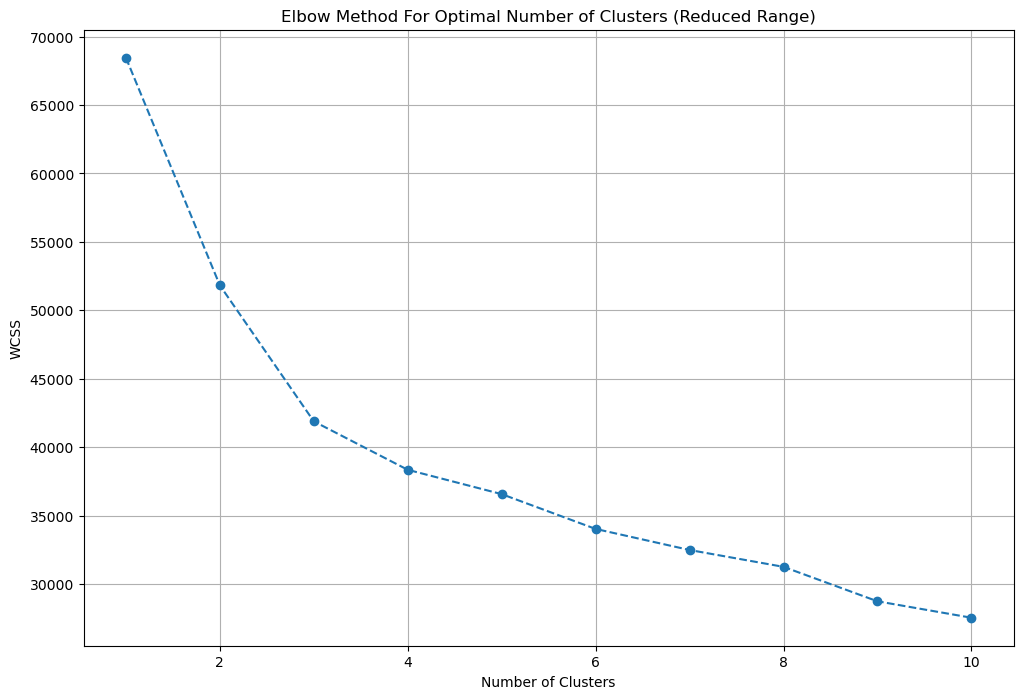

In [201]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [202]:
n_clusters = 3

# Fit the KMeans model
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
kmeans.fit(scaled_data)

# Predict the cluster assignments for each row
cluster_assignments = kmeans.predict(scaled_data)

In [203]:
df = df.iloc[:,:-18]

In [204]:
df['furnishing_type'] = cluster_assignments

In [205]:
df.sample(5)[['furnishDetails','furnishing_type']]
# 0 -> unfurnished
# 1 -> semifurnished
# 2 -> furnished

,furnishDetails,furnishing_type
1766,NaN,0
2284,"['2 Wardrobe', '2 Fan', '3 Geyser', '5 Light', '2 AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Washing Machine', 'No Water Purifier']",0
315,NaN,0
312,"['1 Fan', '1 Geyser', '1 Light', '1 AC', '1 Chimney', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']",0
2717,NaN,0


## 5.features

In [206]:
df[['society','features']].sample(5)

,society,features
1128,pareena mi casa,"['Feng Shui / Vaastu Compliant', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking']"
2553,la vida by tata housing,"['Centrally Air Conditioned', 'Water purifier', 'Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'High Ceiling Height', 'Maintenance Staff', 'False Ceiling Lighting', 'Water Storage', 'Separate entry for servant room', 'No open drainage around', 'Bank Attached Property', 'Piped-gas', 'Internet/wi-fi connectivity', 'Recently Renovated', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Airy Rooms', 'Spacious Interiors', 'Low Density Society', 'Waste Disposal', 'Rain Water Harvesting', 'Water softening plant', 'Shopping Centre', 'Fitness Centre / GYM', 'Club house / Community Center']"
2865,m3m heights,"['Power Back-up', 'Security / Fire Alarm', 'Intercom Facility', 'Lift(s)', 'Swimming Pool', 'Maintenance Staff', 'Water Storage', 'Park', 'Visitor Parking', 'Fitness Centre / GYM', 'Club house / Community Center', 'Water softening plant']"
296,godrej nature plus,"['Security / Fire Alarm', 'Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Intercom Facility', 'Lift(s)', 'Water purifier', 'High Ceiling Height', 'Maintenance Staff', 'Water Storage', 'Visitor Parking', 'Swimming Pool', 'Park', 'Security Personnel', 'Natural Light', 'Internet/wi-fi connectivity', 'Airy Rooms', 'Spacious Interiors', 'Shopping Centre', 'Fitness Centre / GYM', 'Waste Disposal', 'Rain Water Harvesting', 'Club house / Community Center', 'Water softening plant']"
453,sahara grace,"['Power Back-up', 'Lift(s)', 'Swimming Pool', 'Park', 'Fitness Centre / GYM', 'Club house / Community Center']"


In [207]:
df['features'].isnull().sum()

635

In [208]:
import pandas as pd
app_df = pd.read_csv('/Users/yogeshgupta/neeraj/data/processed/appartments.csv')
app_df.head(2)

,PropertyName,PropertySubName,NearbyLocations,LocationAdvantages,Link,PriceDetails,TopFacilities
0,Smartworld One DXP,"2, 3, 4 BHK Apartment in Sector 113, Gurgaon","['Bajghera Road', 'Palam Vihar Halt', 'DPSG Palam Vihar', 'Park Hospital', 'Gurgaon Railway Station']","{'Bajghera Road': '800 Meter', 'Palam Vihar Halt': '2.5 KM', 'DPSG Palam Vihar': '3.1 KM', 'Park Hospital': '3.1 KM', 'Gurgaon Railway Station': '4.9 KM', 'The NorthCap University': '5.4 KM', 'Dwarka Expy': '1.2 KM', 'Hyatt Place Gurgaon Udyog Vihar': '7.7 KM', 'Dwarka Sector 21, Metro Station': '7.2 KM', 'Pacific D21 Mall': '7.4 KM', 'Indira Gandhi International Airport': '14.7 KM', 'Hamoni Golf Camp': '6.2 KM', 'Fun N Food Waterpark': '8.8 KM', 'Accenture DDC5': '9 KM'}",https://www.99acres.com/smartworld-one-dxp-sector-113-gurgaon-npxid-r400415,"{'2 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,370 sq.ft.', 'price-range': '₹ 2 - 2.4 Cr'}, '3 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '1,850 - 2,050 sq.ft.', 'price-range': '₹ 2.25 - 3.59 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Carpet Area', 'area': '2,600 sq.ft.', 'price-range': '₹ 3.24 - 4.56 Cr'}}","['Swimming Pool', 'Salon', 'Restaurant', 'Spa', 'Cafeteria', 'Sun Deck', '24x7 Security', 'Club House', 'Gated Community']"
1,M3M Crown,"3, 4 BHK Apartment in Sector 111, Gurgaon","['DPSG Palam Vihar Gurugram', 'The NorthCap University', 'Park Hospital, Palam Vihar', 'Pacific D21 Mall', 'Palam Vihar Halt Railway Station']","{'DPSG Palam Vihar Gurugram': '1.4 Km', 'The NorthCap University': '4.4 Km', 'Park Hospital, Palam Vihar': '1.4 Km', 'Pacific D21 Mall': '8.2 Km', 'Palam Vihar Halt Railway Station': '1.2 Km', 'Dwarka Sector 21 Metro Station': '8.1 Km', 'Dwarka Expressway': '450 m', 'Fun N Food Water Park': '8.1 Km', 'Indira Gandhi International Airport': '14.1 Km', 'Tau DeviLal Sports Complex': '11.2 Km', 'Hamoni Golf Camp': '5 Km', 'Hyatt Place': '6.1 Km', 'Altrade Business Centre': '11.2 Km'}",https://www.99acres.com/m3m-crown-sector-111-gurgaon-npxid-r404068,"{'3 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '1,605 - 2,170 sq.ft.', 'price-range': '₹ 2.2 - 3.03 Cr'}, '4 BHK': {'building_type': 'Apartment', 'area_type': 'Super Built-up Area', 'area': '2,248 - 2,670 sq.ft.', 'price-range': '₹ 3.08 - 3.73 Cr'}}","['Bowling Alley', 'Mini Theatre', 'Manicured Garden', 'Swimming Pool', 'Flower Garden', 'Reading Lounge', 'Golf Course', 'Barbecue', 'Sauna']"


In [209]:
app_df['PropertyName'] = app_df['PropertyName'].str.lower()

In [210]:
temp_df = df[df['features'].isnull()]

In [211]:
temp_df.shape

(635, 26)

In [212]:
x = temp_df.merge(app_df,left_on='society',right_on='PropertyName',how='left')['TopFacilities']

In [213]:
df.loc[temp_df.index,'features'] = x.values

In [214]:
df['features'].isnull().sum()

481

In [215]:
from sklearn.preprocessing import MultiLabelBinarizer
import ast

In [216]:
# Convert the string representation of lists in the 'features' column to actual lists
df['features_list'] = df['features'].apply(lambda x: ast.literal_eval(x) if pd.notnull(x) and x.startswith('[') else [])

# Use MultiLabelBinarizer to convert the features list into a binary matrix
mlb = MultiLabelBinarizer()
features_binary_matrix = mlb.fit_transform(df['features_list'])

# Convert the binary matrix into a DataFrame
features_binary_df = pd.DataFrame(features_binary_matrix, columns=mlb.classes_)

In [217]:
features_binary_df.sample(5)

,24/7 Power Backup,24/7 Water Supply,24x7 Security,ATM,Aerobics Centre,Air Hockey,Airy Rooms,Amphitheatre,Automated Car Wash,Badminton Court,Bank Attached Property,Banquet Hall,Bar/Chill-Out Lounge,Barbecue,Basketball Court,Beach Volley Ball Court,Billiards,Bowling Alley,Bus Shelter,Business Lounge,CCTV Camera Security,Cafeteria,Car Parking,Car wash area,Card Room,Centrally Air Conditioned,Changing Area,Children's Play Area,Cigar Lounge,Clinic,Club House,Club house / Community Center,Community Hall,Concierge Service,Conference room,Creche/Day care,Cricket Pitch,Doctor on Call,Earthquake Resistant,Entrance Lobby,False Ceiling Lighting,Feng Shui / Vaastu Compliant,Fire Fighting Systems,Fitness Centre / GYM,Flower Garden,Food Court,Foosball,Football,Fountain,Gated Community,Gazebo,Golf Course,Grocery Shop,Gymnasium,High Ceiling Height,High Speed Elevators,Infinity Pool,Intercom Facility,Internal Street Lights,Internet/wi-fi connectivity,Jacuzzi,Jogging Track,Landscape Garden,Laundry,Lawn Tennis Court,Library,Lift(s),Lounge,Low Density Society,Maintenance Staff,Manicured Garden,Medical Centre,Milk Booth,Mini Theatre,Multipurpose Court,Multipurpose Hall,Natural Light,Natural Pond,No open drainage around,Park,Party Lawn,Pergola,Piped Gas,Piped-gas,Pool Table,Power Back up Lift,Power Back-up,Private Garden / Terrace,Property Staff,RO System,Rain Water Harvesting,Reading Lounge,Recently Renovated,Reflexology Park,Restaurant,Salon,Sauna,School,Security / Fire Alarm,Security Personnel,Separate entry for servant room,Sewage Treatment Plant,Shopping Centre,Skating Rink,Solar Lighting,Solar Water Heating,Spa,Spacious Interiors,Squash Court,Steam Room,Sun Deck,Swimming Pool,Temple,Terrace Garden,Theatre,Toddler Pool,Valet Parking,Vastu Compliant,Video Door Security,Visitor Parking,Visitors Parking,Volley Ball Court,Waiting Lounge,Waste Disposal,Water Softener Plant,Water Storage,Water purifier,Water softening plant,Wi-Fi Connectivity,Yoga/Meditation Area
1460,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3360,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0
2828,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0
743,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
207,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,1,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,0,0


In [218]:
features_binary_df.shape

(3803, 130)

In [219]:
wcss_reduced = []

for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(features_binary_df)
    wcss_reduced.append(kmeans.inertia_)

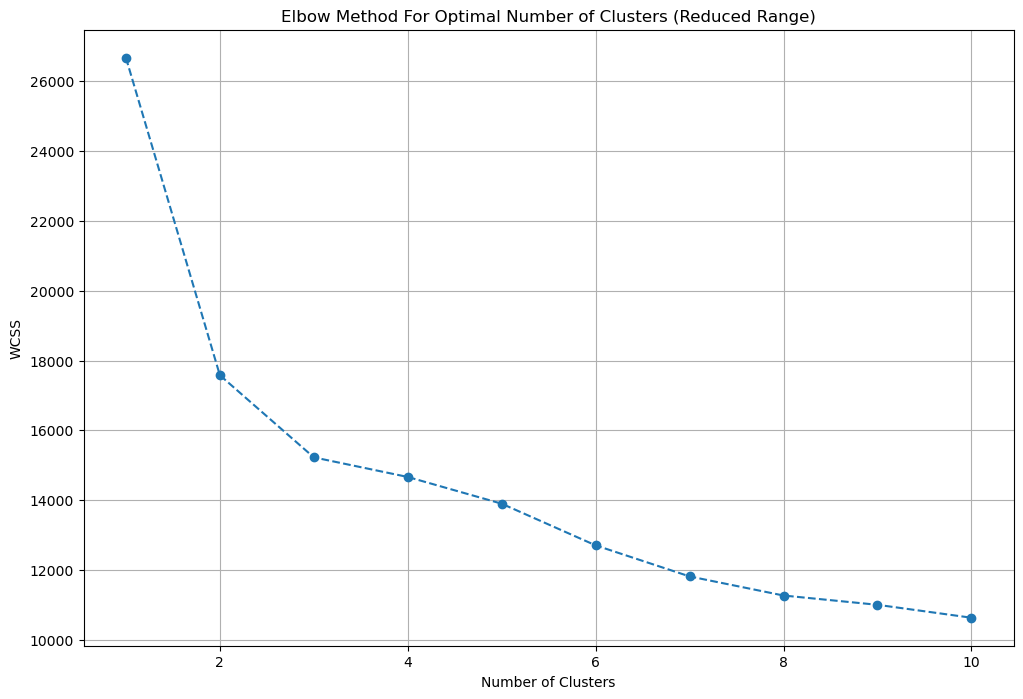

In [220]:
# Plot the results
plt.figure(figsize=(12, 8))
plt.plot(range(1,11), wcss_reduced, marker='o', linestyle='--')
plt.title('Elbow Method For Optimal Number of Clusters (Reduced Range)')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [221]:
# Define the weights for each feature as provided
# Assigning weights based on perceived luxury contribution
weights = {
    '24/7 Power Backup': 8,
    '24/7 Water Supply': 4,
    '24x7 Security': 7,
    'ATM': 4,
    'Aerobics Centre': 6,
    'Airy Rooms': 8,
    'Amphitheatre': 7,
    'Badminton Court': 7,
    'Banquet Hall': 8,
    'Bar/Chill-Out Lounge': 9,
    'Barbecue': 7,
    'Basketball Court': 7,
    'Billiards': 7,
    'Bowling Alley': 8,
    'Business Lounge': 9,
    'CCTV Camera Security': 8,
    'Cafeteria': 6,
    'Car Parking': 6,
    'Card Room': 6,
    'Centrally Air Conditioned': 9,
    'Changing Area': 6,
    "Children's Play Area": 7,
    'Cigar Lounge': 9,
    'Clinic': 5,
    'Club House': 9,
    'Concierge Service': 9,
    'Conference room': 8,
    'Creche/Day care': 7,
    'Cricket Pitch': 7,
    'Doctor on Call': 6,
    'Earthquake Resistant': 5,
    'Entrance Lobby': 7,
    'False Ceiling Lighting': 6,
    'Feng Shui / Vaastu Compliant': 5,
    'Fire Fighting Systems': 8,
    'Fitness Centre / GYM': 8,
    'Flower Garden': 7,
    'Food Court': 6,
    'Foosball': 5,
    'Football': 7,
    'Fountain': 7,
    'Gated Community': 7,
    'Golf Course': 10,
    'Grocery Shop': 6,
    'Gymnasium': 8,
    'High Ceiling Height': 8,
    'High Speed Elevators': 8,
    'Infinity Pool': 9,
    'Intercom Facility': 7,
    'Internal Street Lights': 6,
    'Internet/wi-fi connectivity': 7,
    'Jacuzzi': 9,
    'Jogging Track': 7,
    'Landscape Garden': 8,
    'Laundry': 6,
    'Lawn Tennis Court': 8,
    'Library': 8,
    'Lounge': 8,
    'Low Density Society': 7,
    'Maintenance Staff': 6,
    'Manicured Garden': 7,
    'Medical Centre': 5,
    'Milk Booth': 4,
    'Mini Theatre': 9,
    'Multipurpose Court': 7,
    'Multipurpose Hall': 7,
    'Natural Light': 8,
    'Natural Pond': 7,
    'Park': 8,
    'Party Lawn': 8,
    'Piped Gas': 7,
    'Pool Table': 7,
    'Power Back up Lift': 8,
    'Private Garden / Terrace': 9,
    'Property Staff': 7,
    'RO System': 7,
    'Rain Water Harvesting': 7,
    'Reading Lounge': 8,
    'Restaurant': 8,
    'Salon': 8,
    'Sauna': 9,
    'Security / Fire Alarm': 9,
    'Security Personnel': 9,
    'Separate entry for servant room': 8,
    'Sewage Treatment Plant': 6,
    'Shopping Centre': 7,
    'Skating Rink': 7,
    'Solar Lighting': 6,
    'Solar Water Heating': 7,
    'Spa': 9,
    'Spacious Interiors': 9,
    'Squash Court': 8,
    'Steam Room': 9,
    'Sun Deck': 8,
    'Swimming Pool': 8,
    'Temple': 5,
    'Theatre': 9,
    'Toddler Pool': 7,
    'Valet Parking': 9,
    'Video Door Security': 9,
    'Visitor Parking': 7,
    'Water Softener Plant': 7,
    'Water Storage': 7,
    'Water purifier': 7,
    'Yoga/Meditation Area': 7
}
# Calculate luxury score for each row
luxury_score = features_binary_df[list(weights.keys())].multiply(list(weights.values())).sum(axis=1)


In [222]:
df['luxury_score'] = luxury_score

In [223]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,additionalRoom,floorNum,facing,agePossession,nearbyLocations,furnishDetails,features,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,features_list,luxury_score
0,flat,trisara our homes 3,sohna road,0.34,5405.0,629.0,Carpet area: 629 (58.44 sq.m.),2,2,1,not available,0.0,NaN,New Property,"['Metro Station', 'Gyanchand Market', 'Rajiv Chowk', 'KMP Expressway', 'Govt.Sr.Sec School(boys)', 'Jindal College', 'Kidzee', 'Vishvakarma Mandir', 'Mamta Hospital', 'Fortis', 'IGI T3', 'Oriental Bank of Commerce', 'Rajiv Gandhi Park']",NaN,NaN,NaN,NaN,629.000000,0,0,0,0,0,0,[],0
1,flat,signature global superbia,sector 95,0.40,6728.0,595.0,Carpet area: 594.52 (55.23 sq.m.),2,2,3,not available,2.0,NaN,Under Construction,"['Huda Metro Station', 'V3S Sapphire Ninety Mall', 'Pataudi Road', 'NH 352W', 'RPS International School', 'SGT University', 'ESIC Hospital', 'Indira Gandhi Intl Airport', 'Farrukh Nagar Railway Station']",[],NaN,NaN,NaN,594.490197,0,0,0,0,0,0,[],0
2,house,independent,sector 2,4.99,18889.0,2642.0,Plot area 270(225.75 sq.m.),4,4,3+,"pooja room,servant room,store room",3.0,North,Moderately Old,"['Palam Vihar Vyapar kendra', 'Palam triangle', 'HUDA Sector 23 Market', 'Ram Mandir', 'Metro Hospital and Heart Institute Gurgaon', ""DR KAPOOR'S Dental Care and Implant Centre"", 'Kalyan Hospital Gurgaon', 'Ansals plaza underground car parking', 'Ansals Plaza above ground car parking', 'HUDA sector 23 parking', 'Axis bank', 'Punjab national bank', 'Oriental bank of commerce', 'Big Cinemas', 'Cafe Coffee Day', 'Pizza Hut', ""Domino's Pizza"", 'Moti Mahal', 'Pind Baluchi', ""McDonald's"", 'Om Sweets', 'Chiranjiv Bharati School', 'Masti ki Pathshala Teach India', 'Swiss Cottage school', 'THE NORTHCAP UNIVERSITY', 'Palam vihar railway station', 'Bijwasan railway station']","['4 Fan', '4 Light', 'No AC', 'No Bed', 'No Chimney', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Geyser', 'No Modular Kitchen', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Feng Shui / Vaastu Compliant', 'Private Garden / Terrace', 'Water Storage', 'Recently Renovated', 'Visitor Parking', 'Internet/wi-fi connectivity', 'Fitness Centre / GYM', 'Waste Disposal']",NaN,270.0,NaN,0,1,1,1,0,0,"[Feng Shui / Vaastu Compliant, Private Garden / Terrace, Water Storage, Recently Renovated, Visitor Parking, Internet/wi-fi connectivity, Fitness Centre / GYM, Waste Disposal]",43
3,house,independent,sector 57,8.00,266666.0,300.0,Plot area 300(27.87 sq.m.),5,4,3,"pooja room,study room,servant room",2.0,North,Relatively New,"['Radhakrishna Shani Mandir', 'Sanatan Dharm Mandir', 'State bank ATM', 'Icici bank ATM', 'Standard chartered ATM', 'Vatsalya Clinic', 'Anand Hospital Gurgaon', 'Kriti Hospital', 'Surgicare Hospital Gurgaon', 'pracksht hospital', 'Meher Clinic', 'Bones Clinic - Orthopaedics', 'Vishesh Dental', 'Park Hospital Gurgaon', 'Neelkanth Health Care', 'Dr. Naresh Pandita', 'Arihant Hospital', 'Dr. Anuj Sharma', 'Wembley estate club', 'HUDA Office Complex', 'Medisca', 'Pernod Ricard Charitable Dispensary', 'SPAZE BUSINESS PARK', 'Unitech', 'Heera Fuel Station', 'HCG CNG Station', 'Hdfc bank', 'Hdfc bank and atm', 'Hdfc bank', '222', 'Pizza Hut', 'Madison and Pike', 'India', 'Haldiram', 'Raj Restaurant', 'Gurugram University', 'Kamla International', 'Amity Global School', 'St. Angels Sr', 'Manav Rachna School', 'Delhi Public School Primary Section', 'IILM', 'St. Angels Jr', 'Iilm University', 'Manav Rachna Swimming Pool']","['1 Geyser', '1 Chimney', '2 AC', 'No Bed', 'No Curtains', 'No Dining Table', 'No Exhaust Fan', 'No Fan', 'No Modular Kitchen', 'No Light', 'No Microwave', 'No Fridge', 'No Sofa', 'No Stove', 'No TV', 'No Wardrobe', 'No Washing Machine', 'No Water Purifier']","['Water Storage', 'Visitor Parking', 'Waste Disposal'

In [224]:
# cols to drop -> nearbyLocations,furnishDetails, features,features_list, additionalRoom
df.drop(columns=['nearbyLocations','furnishDetails','features','features_list','additionalRoom'],inplace=True)

In [225]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
3131,house,independent,sector 41,1.65,13750.0,1200.0,Built Up area: 1200 (111.48 sq.m.),1,1,0,1.0,NaN,Undefined,NaN,1200.0,NaN,0,0,0,0,0,0,0
2967,house,not applicable,sector 4,0.80,54794.0,146.0,Plot area 146(13.56 sq.m.),5,4,3,3.0,NaN,Under Construction,NaN,146.0,NaN,0,0,0,0,0,0,0
3333,house,independent,sector 54,5.50,38194.0,1440.0,Plot area 160(133.78 sq.m.),18,18,3+,4.0,South-West,Relatively New,NaN,1440.0,NaN,0,1,0,0,0,2,70
1385,flat,sare green parc phase 3,sector 92,1.08,5150.0,2097.0,Super Built up area 2090(194.17 sq.m.),4,4,2,16.0,NaN,New Property,2090.0,NaN,NaN,0,1,0,0,0,0,107
1693,house,independent,sector 26,5.80,32222.0,1800.0,Plot area 200(167.23 sq.m.),4,3,2,2.0,East,Relatively New,NaN,1800.0,NaN,0,0,1,0,0,0,21


In [226]:
df.shape

(3803, 23)

In [227]:
df.to_csv('/Users/yogeshgupta/neeraj/data/processed/gurgaon_properties_cleaned_v2.csv',index=False)